In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('breast-cancer.csv')
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [4]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [5]:
numerical_cols = df.select_dtypes(include=['number']).columns.tolist()
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
print("\nNumerical Columns:", numerical_cols)
print("Categorical Columns:", categorical_cols)


Numerical Columns: ['id', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']
Categorical Columns: ['diagnosis']


In [5]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [6]:
df.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [10]:
df.diagnosis

0      M
1      M
2      M
3      M
4      M
      ..
564    M
565    M
566    M
567    M
568    B
Name: diagnosis, Length: 569, dtype: object

<Axes: ylabel='Density'>

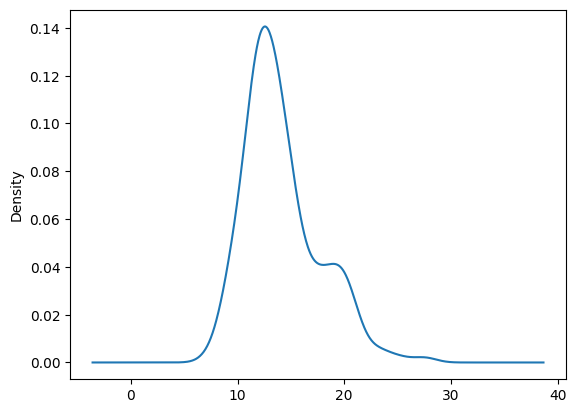

In [12]:
df.radius_mean.plot(kind='kde')

In [16]:
df.radius_mean.skew()

np.float64(0.9423795716730992)

<Axes: ylabel='Density'>

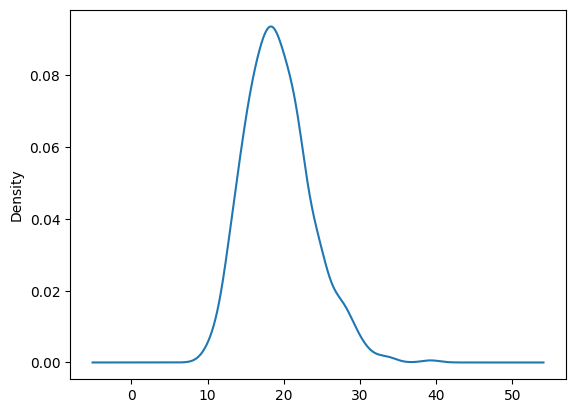

In [17]:
df.texture_mean.plot(kind='kde')

In [18]:
df.texture_mean.skew()

np.float64(0.6504495420828159)

<Axes: ylabel='Density'>

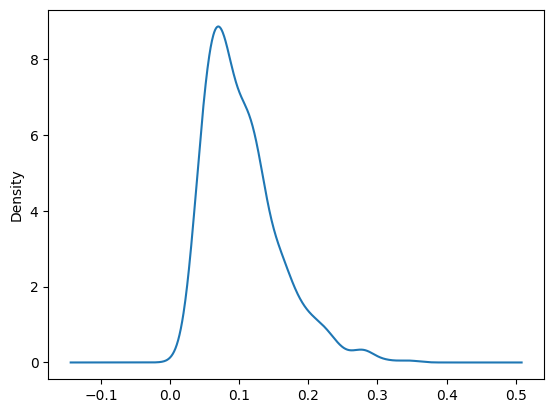

In [19]:
df.compactness_mean.plot(kind='kde')

In [20]:
df.compactness_mean.skew()

np.float64(1.1901230311980404)

In [21]:
a = df.compactness_mean.mean()+df.compactness_mean.std()*3 

In [22]:
b = df.compactness_mean.mean()-df.compactness_mean.std()*3

In [23]:
df[df.compactness_mean>a]

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.1184,0.2776,0.3001,0.1471,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
3,84348301,M,11.42,20.38,77.58,386.1,0.1425,0.2839,0.2414,0.1052,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
78,8610862,M,20.18,23.97,143.70,1245.0,0.1286,0.3454,0.3754,0.1604,...,23.37,31.72,170.30,1623.0,0.1639,0.6164,0.7681,0.2508,0.5440,0.09964
82,8611555,M,25.22,24.91,171.50,1878.0,0.1063,0.2665,0.3339,0.1845,...,30.00,33.62,211.70,2562.0,0.1573,0.6076,0.6476,0.2867,0.2355,0.10510
108,86355,M,22.27,19.67,152.80,1509.0,0.1326,0.2768,0.4264,0.1823,...,28.40,28.01,206.80,2360.0,0.1701,0.6997,0.9608,0.2910,0.4055,0.09789
122,865423,M,24.25,20.20,166.20,1761.0,0.1447,0.2867,0.4268,0.2012,...,26.02,23.99,180.90,2073.0,0.1696,0.4244,0.5803,0.2248,0.3222,0.08009
181,873593,M,21.09,26.57,142.70,1311.0,0.1141,0.2832,0.2487,0.1496,...,26.68,33.48,176.50,2089.0,0.1491,0.7584,0.6780,0.2903,0.4098,0.12840
258,887181,M,15.66,23.20,110.20,773.5,0.1109,0.3114,0.3176,0.1377,...,19.85,31.64,143.70,1226.0,0.1504,0.5172,0.6181,0.2462,0.3277,0.10190
567,927241,M,20.60,29.33,140.10,1265.0,0.1178,0.2770,0.3514,0.1520,...,25.74,39.42,184.60,1821.0,0.1650,0.8681,0.9387,0.2650,0.4087,0.12400


In [24]:
df[df.compactness_mean<b]

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst


<Axes: ylabel='Density'>

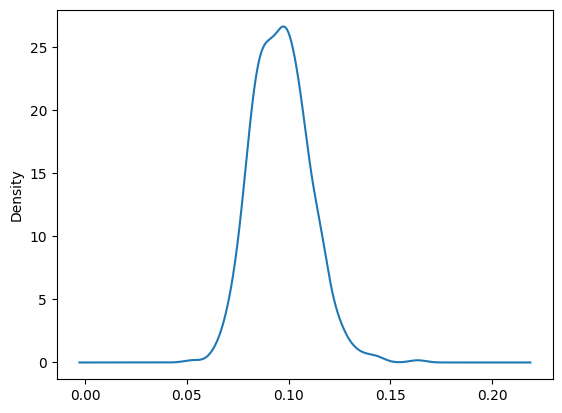

In [26]:
df.smoothness_mean.plot(kind='kde')

In [27]:
df.smoothness_mean.isnull().sum()

np.int64(0)

In [28]:
df.symmetry_worst

0      0.4601
1      0.2750
2      0.3613
3      0.6638
4      0.2364
        ...  
564    0.2060
565    0.2572
566    0.2218
567    0.4087
568    0.2871
Name: symmetry_worst, Length: 569, dtype: float64

In [29]:
df.symmetry_worst.isnull().sum()

np.int64(0)

<Axes: ylabel='Density'>

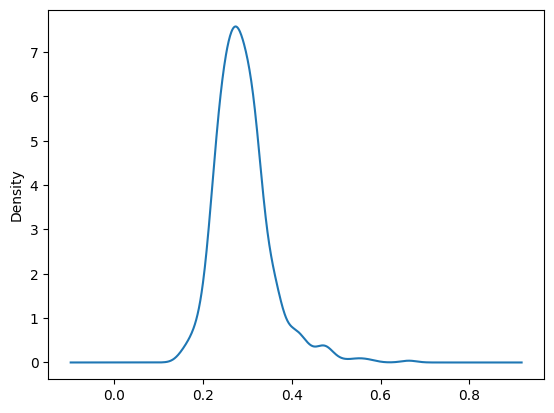

In [31]:
df.symmetry_worst.plot(kind='kde')

In [4]:
df.area_se.skew()

np.float64(5.447186284898394)

In [5]:
c = df.area_se.mean()+df.area_se.std()*3 

In [6]:
d = df.area_se.mean()-df.area_se.std()*3

In [7]:
df[df.area_se>c]

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
122,865423,M,24.25,20.20,166.2,1761.0,0.14470,0.28670,0.4268,0.20120,...,26.02,23.99,180.9,2073.0,0.1696,0.4244,0.5803,0.2248,0.3222,0.08009
212,8810703,M,28.11,18.47,188.5,2499.0,0.11420,0.15160,0.3201,0.15950,...,28.11,18.47,188.5,2499.0,0.1142,0.1516,0.3201,0.1595,0.1648,0.05525
265,88995002,M,20.73,31.12,135.7,1419.0,0.09469,0.11430,0.1367,0.08646,...,32.49,47.16,214.0,3432.0,0.1401,0.2644,0.3442,0.1659,0.2868,0.08218
368,9011971,M,21.71,17.25,140.9,1546.0,0.09384,0.08562,0.1168,0.08465,...,30.75,26.44,199.5,3143.0,0.1363,0.1628,0.2861,0.1820,0.2510,0.06494
461,911296202,M,27.42,26.27,186.9,2501.0,0.10840,0.19880,0.3635,0.16890,...,36.04,31.37,251.2,4254.0,0.1357,0.4256,0.6833,0.2625,0.2641,0.07427
503,915143,M,23.09,19.83,152.1,1682.0,0.09342,0.12750,0.1676,0.10030,...,30.79,23.87,211.5,2782.0,0.1199,0.3625,0.3794,0.2264,0.2908,0.07277


<Axes: >

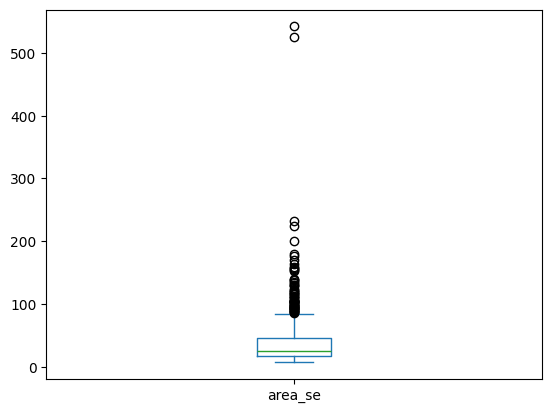

In [27]:
df.area_se.plot(kind='box')

In [9]:
df.concavity_se.skew()

np.float64(5.110463049043661)

In [10]:
e = df.concavity_se.mean()+df.concavity_se.std()*3 

In [11]:
f = df.concavity_se.mean()-df.concavity_se.std()*3 

In [12]:
df[df.concavity_se>e]

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
68,859471,B,9.029,17.33,58.79,250.5,0.10660,0.1413,0.3130,0.04375,...,10.31,22.65,65.50,324.7,0.14820,0.4365,1.2520,0.1750,0.4228,0.11750
112,86409,B,14.260,19.65,97.83,629.9,0.07837,0.2233,0.3003,0.07798,...,15.30,23.73,107.00,709.0,0.08949,0.4193,0.6783,0.1505,0.2398,0.10820
122,865423,M,24.250,20.20,166.20,1761.0,0.14470,0.2867,0.4268,0.20120,...,26.02,23.99,180.90,2073.0,0.16960,0.4244,0.5803,0.2248,0.3222,0.08009
152,8710441,B,9.731,15.34,63.78,300.2,0.10720,0.1599,0.4108,0.07857,...,11.02,19.49,71.04,380.5,0.12920,0.2772,0.8216,0.1571,0.3108,0.12590
213,881094802,M,17.420,25.56,114.50,948.0,0.10060,0.1146,0.1682,0.06597,...,18.07,28.07,120.40,1021.0,0.12430,0.1793,0.2803,0.1099,0.1603,0.06818
376,901315,B,10.570,20.22,70.15,338.3,0.09073,0.1660,0.2280,0.05941,...,10.85,22.82,76.51,351.9,0.11430,0.3619,0.6030,0.1465,0.2597,0.12000


<Axes: >

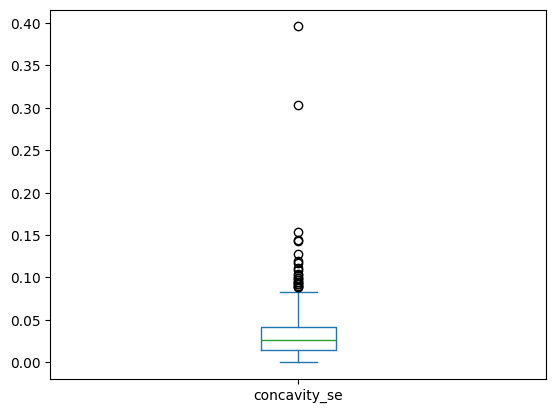

In [26]:
df.concavity_se.plot(kind='box')

In [13]:
df.fractal_dimension_se.skew()

np.float64(3.923968620227413)

In [14]:
g = df.fractal_dimension_se.mean()+df.fractal_dimension_se.std()*3 

In [15]:
h = df.fractal_dimension_se.mean()-df.fractal_dimension_se.std()*3 

In [16]:
df[df.fractal_dimension_se>g]

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
12,846226,M,19.170,24.80,132.40,1123.0,0.09740,0.2458,0.20650,0.11180,...,20.960,29.94,151.70,1332.0,0.10370,0.3903,0.3639,0.17670,0.3176,0.10230
71,859711,B,8.888,14.64,58.79,244.0,0.09783,0.1531,0.08606,0.02872,...,9.733,15.67,62.56,284.4,0.12070,0.2436,0.1434,0.04786,0.2254,0.10840
112,86409,B,14.260,19.65,97.83,629.9,0.07837,0.2233,0.30030,0.07798,...,15.300,23.73,107.00,709.0,0.08949,0.4193,0.6783,0.15050,0.2398,0.10820
151,871001502,B,8.219,20.70,53.27,203.9,0.09405,0.1305,0.13210,0.02168,...,9.092,29.72,58.08,249.8,0.16300,0.4310,0.5381,0.07879,0.3322,0.14860
152,8710441,B,9.731,15.34,63.78,300.2,0.10720,0.1599,0.41080,0.07857,...,11.020,19.49,71.04,380.5,0.12920,0.2772,0.8216,0.15710,0.3108,0.12590
176,872608,B,9.904,18.06,64.60,302.4,0.09699,0.1294,0.13070,0.03716,...,11.260,24.39,73.07,390.2,0.13010,0.2950,0.3486,0.09910,0.2614,0.11620
213,881094802,M,17.420,25.56,114.50,948.0,0.10060,0.1146,0.16820,0.06597,...,18.070,28.07,120.40,1021.0,0.12430,0.1793,0.2803,0.10990,0.1603,0.06818
290,89143602,B,14.410,19.73,96.03,651.0,0.08757,0.1676,0.13620,0.06602,...,15.770,22.13,101.70,767.3,0.09983,0.2472,0.2220,0.10210,0.2272,0.08799
376,901315,B,10.570,20.22,70.15,338.3,0.09073,0.1660,0.22800,0.05941,...,10.850,22.82,76.51,351.9,0.11430,0.3619,0.6030,0.14650,0.2597,0.12000
388,903011,B,11.270,15.50,73.38,392.0,0.08365,0.1114,0.10070,0.02757,...,12.040,18.93,79.73,450.0,0.11020,0.2809,0.3021,0.08272,0.2157,0.10430


<Axes: >

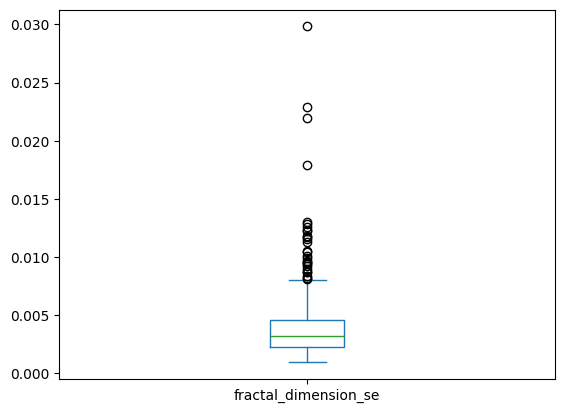

In [25]:
df.fractal_dimension_se.plot(kind='box')

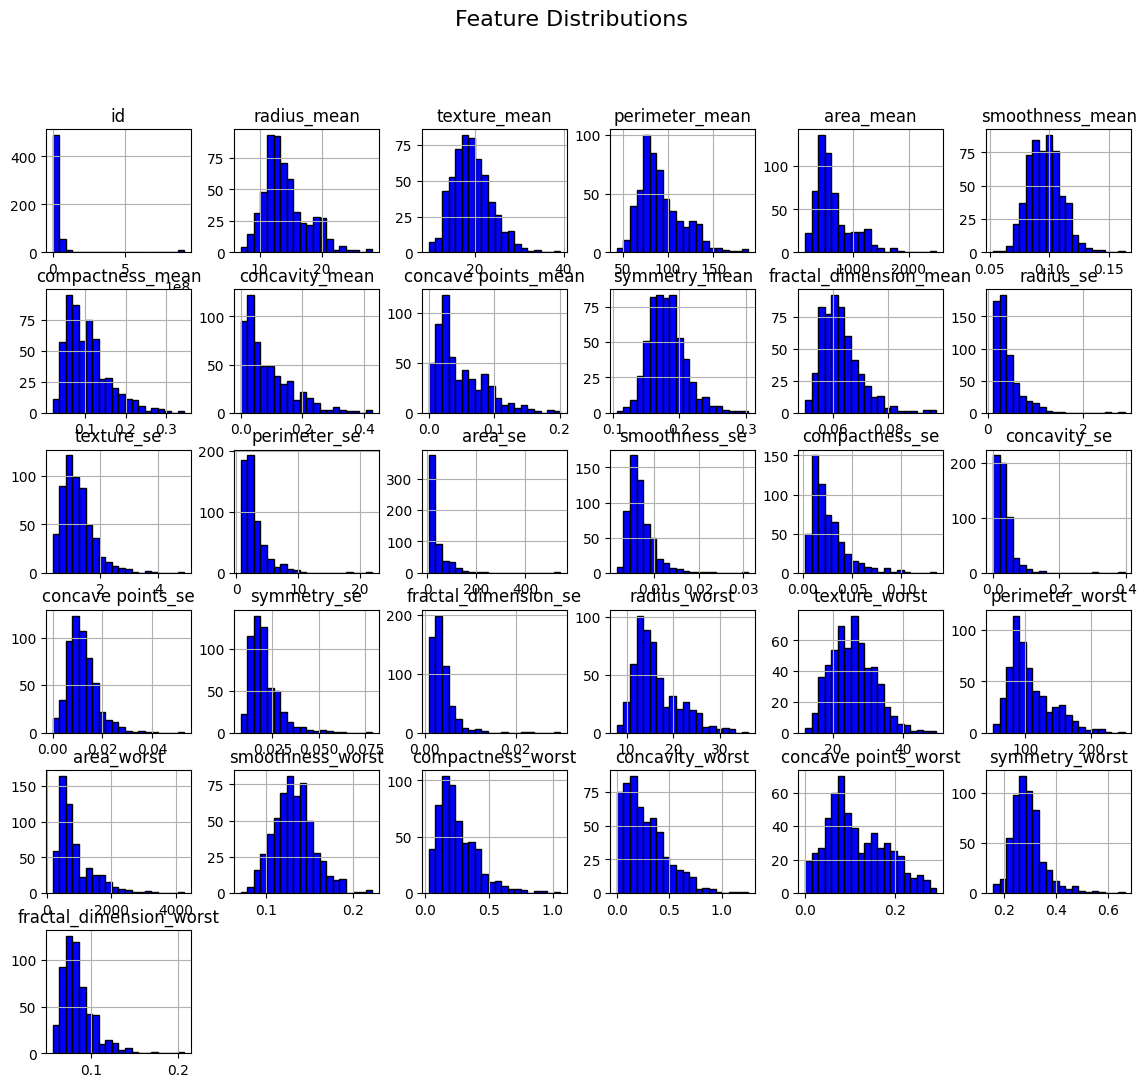

In [24]:
df[numerical_cols].hist(figsize=(14, 12), bins=20, color='blue', edgecolor='black')
plt.suptitle("Feature Distributions", fontsize=16)
plt.show()

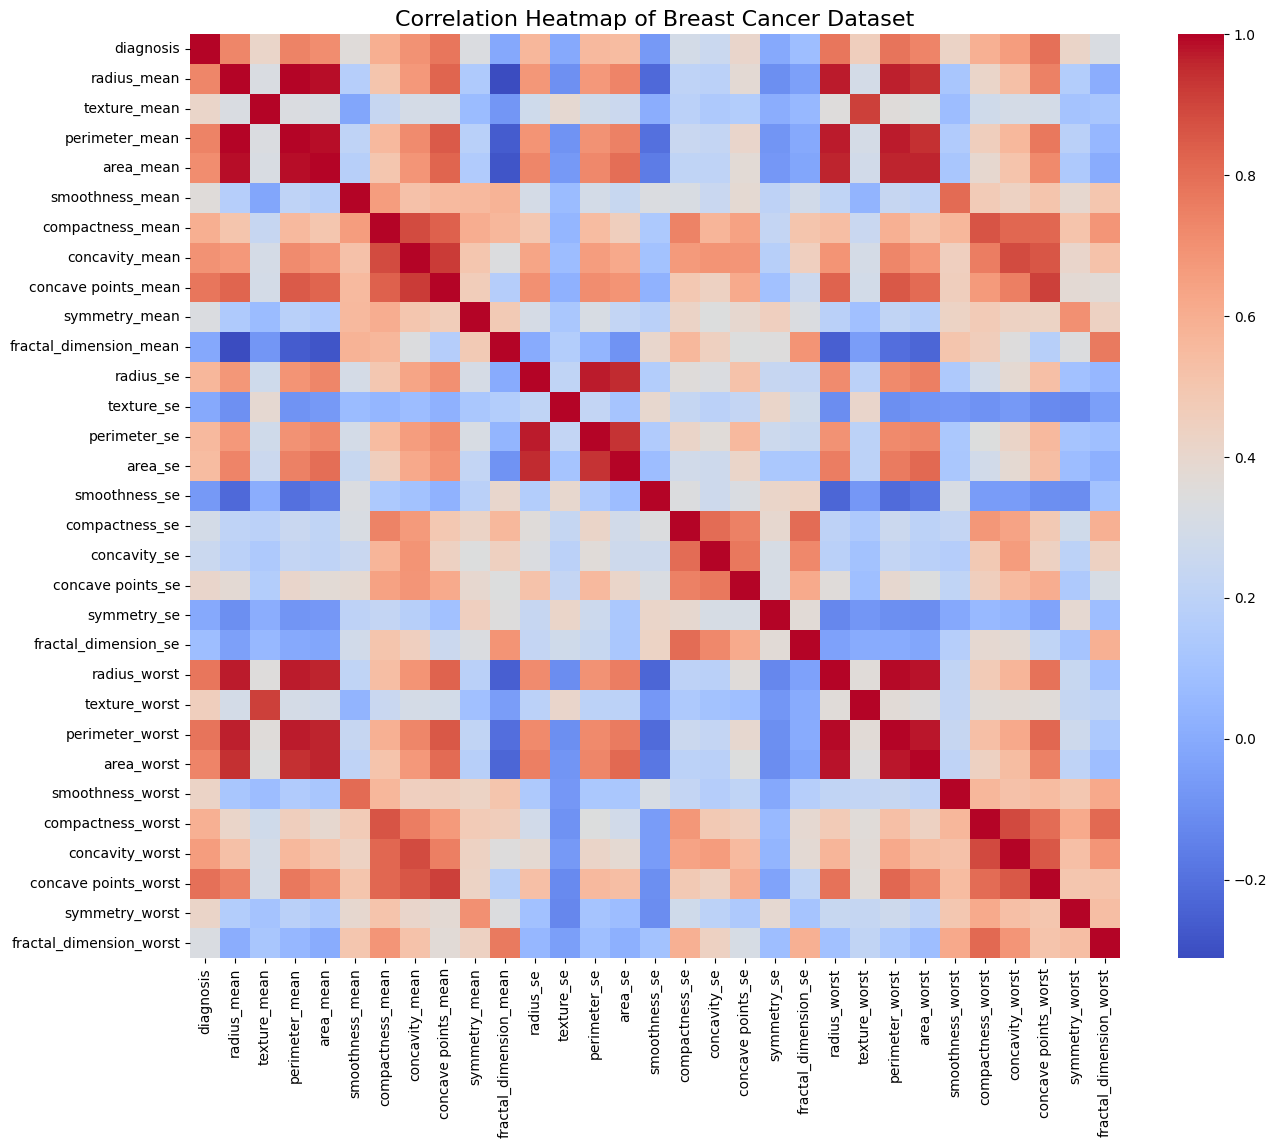

In [58]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("breast-cancer.csv" )


df.drop(columns=['id'], inplace=True)


df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})


corr_matrix = df.corr()


plt.figure(figsize=(15, 12))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=False)


plt.title("Correlation Heatmap of Breast Cancer Dataset", fontsize=16)


plt.show()


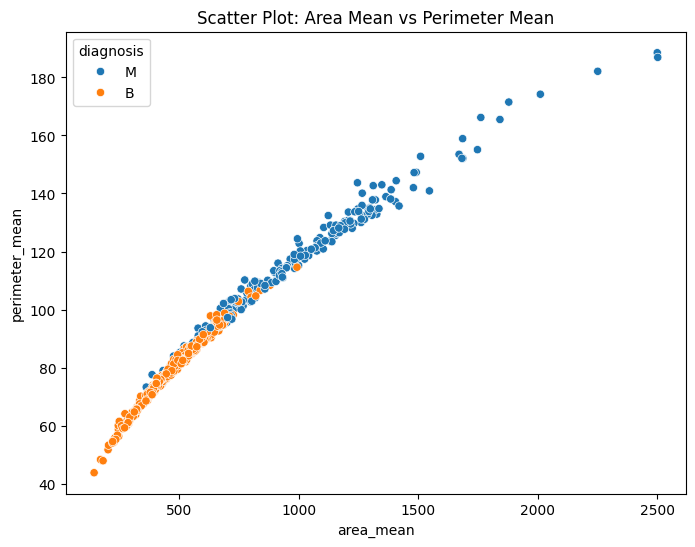

In [30]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['area_mean'], y=df['perimeter_mean'], hue=df['diagnosis'])
plt.title("Scatter Plot: Area Mean vs Perimeter Mean")
plt.show()

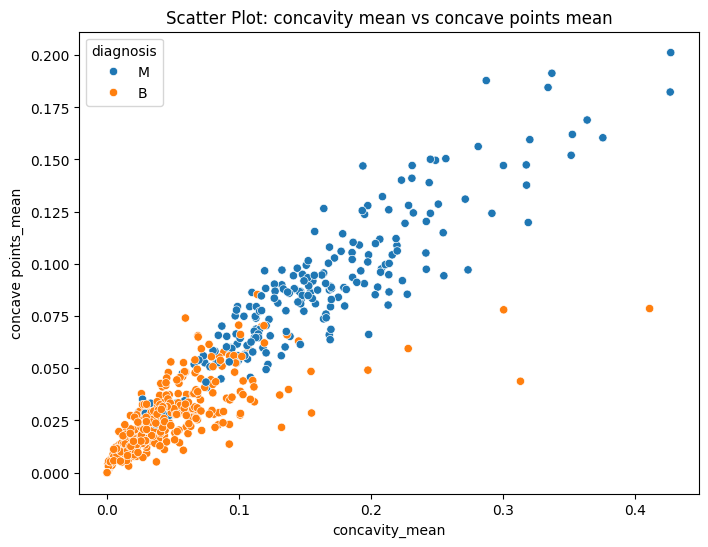

In [40]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['concavity_mean'], y=df['concave points_mean'], hue=df['diagnosis'])
plt.title("Scatter Plot: concavity mean vs concave points mean")
plt.show()

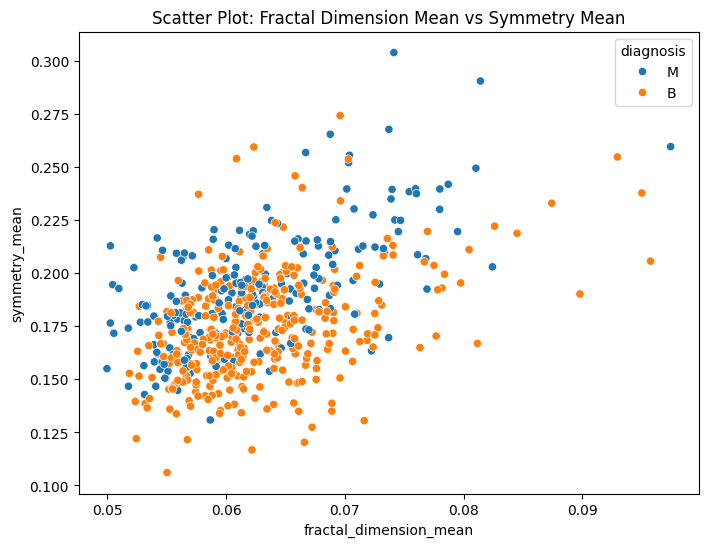

In [41]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['fractal_dimension_mean'], y=df['symmetry_mean'], hue=df['diagnosis'])
plt.title("Scatter Plot: Fractal Dimension Mean vs Symmetry Mean")
plt.show()

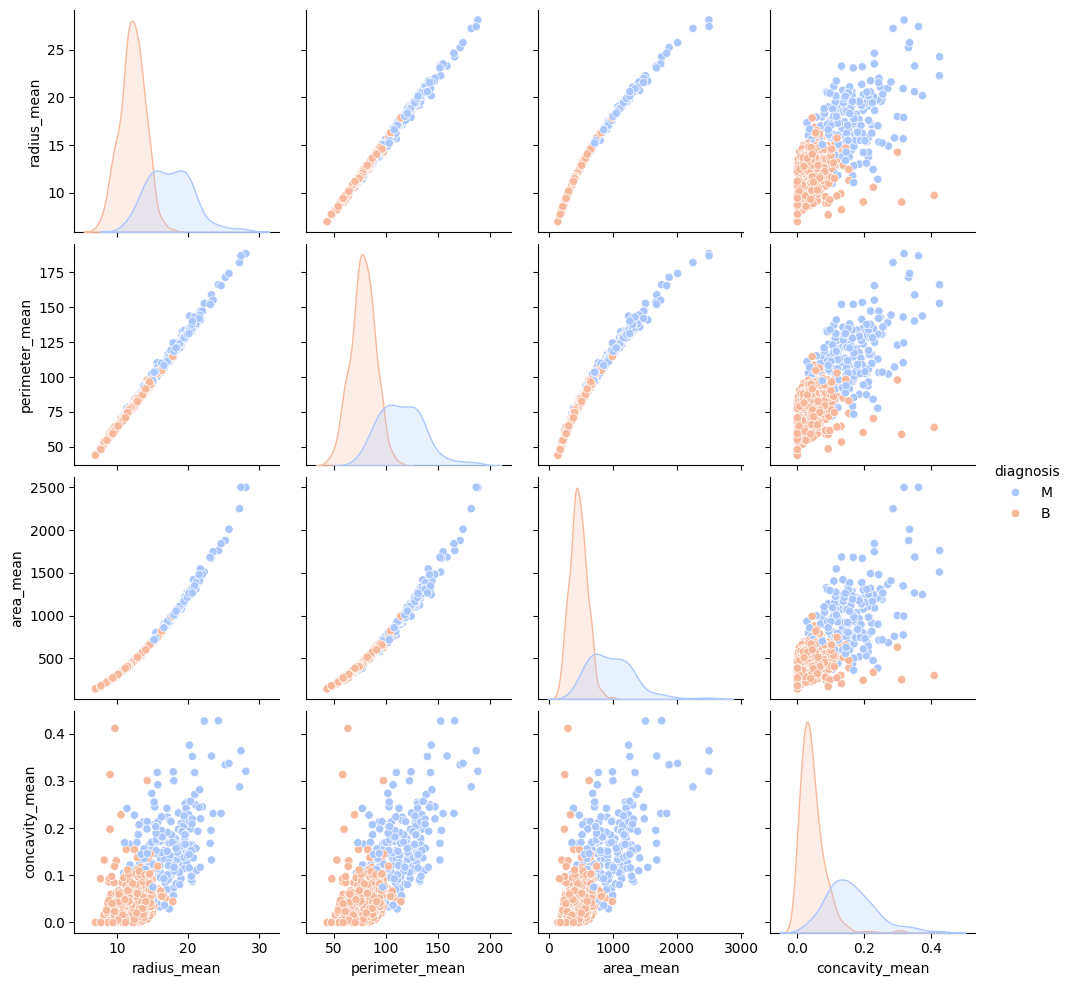

In [6]:
# Pairplot of Highly Correlated Features
sns.pairplot(df, vars=['radius_mean', 'perimeter_mean', 'area_mean', 'concavity_mean'], hue='diagnosis', palette='coolwarm')
plt.show()